In [1]:
!date

Sun Jan 22 22:31:30 PST 2023


In [2]:
!echo $CONDA_PREFIX

/c4/home/derek/miniconda3/envs/pygenometracks


In [3]:
import os
#from pybiomart import Dataset
from pygenometracks import tracks
from IPython.display import Image

In [4]:
import pandas as pd
import scanpy as sc

In [5]:
os.makedirs('./sashimi_plots', exist_ok=True)

In [6]:
input_dir = '/c4/home/derek/data1/derek/data_scSLR/PBMC/'

In [7]:
diff_spl_introns = pd.read_csv(input_dir+'diff_introns_T4.csv')

In [8]:
diff_spl_intron_groups = pd.read_csv(input_dir+'diff_intron_groups_T4.csv')

In [9]:
input_dir= "/nowakowskilab/data1/HDD-2/derek/SLR_temp/CAT_20220904_PBMC/"

adata = sc.read_h5ad(input_dir+'/concat.3.new.h5ad')

adata = adata[(adata.obs['pool_well'] == '5_1') | (adata.obs['pool_well'] == '5_2')]

adata.obs_names = adata.obs_names.str.replace(pat='-1-22',repl='-0').str.replace(pat='-1-23',repl='-1')

adata_5prime = sc.read_h5ad('/c4/home/derek/data1/derek/data_scSLR/PBMC/5prime_exp_h5ad')

adata = adata[adata.obs_names.isin(adata_5prime.obs_names)]

adata.obsm['X_umap'] = adata_5prime.obsm['X_umap']

In [10]:
adata

AnnData object with n_obs × n_vars = 19087 × 18450
    obs: 'n_counts_mrna', 'n_counts_adts', 'NUM.SNPS', 'NUM.READS', 'DROPLET.TYPE', 'BEST.GUESS', 'percent_mito', 'pool', 'well', 'pool_well', 'batch', 'pool_clust', 'freemux_cluster', 'donor', 'timepoint', 'respiratory_support_D0', 'onset_to_D0_days', 'intubated_days', 'admission_to_discharge', 'D0_to_death', 'race', 'sex', 'ethnicity', 'consent', 'death', 'pulmonary_infection', 'non_pulmonary_infection', 'leiden', 'onset_to_D0_days-as_float', 'D0_to_death-as_float', 'original_leiden', 'ct1', 'ct2', 'ct3', 'RBC', 'WBC_count1', 'WBC_count2', 'WBC_count3', 'Lymphocyte_count', 'Monocyte_count', 'cell_group', 'exclude_restricted', 'IFN_shared_score', 'IFN_beta_score', 'IFN_gamma_score', 'actual_timepoint', 'CT_1', 'CT_2', 'CT_Host', 'dCT_1', 'dCT_2', 'days_from_start', 'COVID_status', 'admission_level', 'respiratory_support', 'NIH_clinical', 'COVID_severity', 'COVID_severity_merged', 'NIH_ordinal'
    var: 'feature_types', 'genome', 'gene

In [11]:
adata.obs.ct2.cat.categories

Index(['B_Mem', 'B_Mem_Prolif', 'B_Naive', 'B_Preplasma', 'NKT', 'NK_CD16+',
       'NK_CD56++', 'NK_Prolif', 'PB', 'PB_Prolif', 'Progen_CLP', 'Progen_CMP',
       'Progen_MEP', 'Progen_MPP', 'T4_Mem', 'T4_Mem_Prolif', 'T4_Naive',
       'T4_Treg', 'T8_MAIT', 'T8_Mem', 'T8_Mem_Prolif', 'T8_Naive',
       'T_NK_Prolif', 'Tgd_1', 'Tgd_2', 'cDC_1', 'cDC_2', 'cM', 'ncM', 'pDC'],
      dtype='object')

/c4/home/derek/miniconda3/envs/pygenometracks/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1225: FutureWarning: In a future version of pandas all arguments of Categorical.replace except for the argument 'value' will be keyword-only.
  values = values.replace(values.categories.difference(groups), np.nan)
/c4/home/derek/miniconda3/envs/pygenometracks/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1225: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


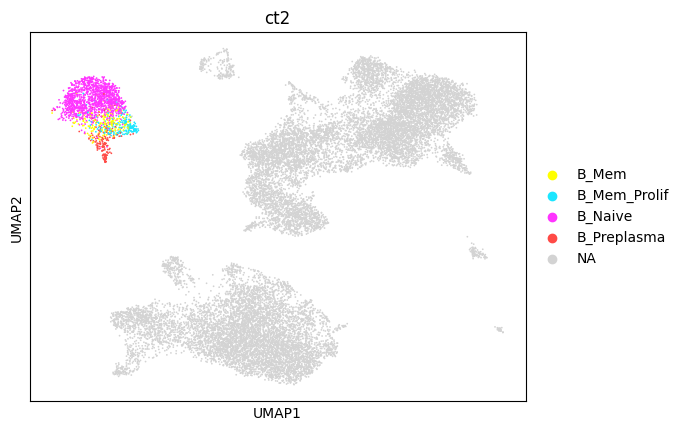

In [12]:
sc.pl.umap(adata,
           color='ct2',
           groups=['B_Mem', 'B_Mem_Prolif', 'B_Naive', 'B_Preplasma'],
          )

In [74]:
temp = adata[(adata.obs.ct1 == 'B') & (adata.obs.pool_well == '5_1')].obs.ct2          #.to_csv('T8_sample_1_cell_list.txt')

In [79]:
temp.index = temp.index.str[:-2]

In [80]:
temp

barcode_index
AAAGATGAGAGGTTGC         B_Naive
AAAGATGAGCGAGAAA         B_Naive
AAAGATGAGCTAGTGG         B_Naive
AAAGATGGTCTGCAAT         B_Naive
AAAGCAAAGTTGTCGT           B_Mem
                        ...     
TTTGCGCAGCTTATCG    B_Mem_Prolif
TTTGCGCCACACGCTG         B_Naive
TTTGCGCCACGGCCAT         B_Naive
TTTGTCAGTTCACCTC    B_Mem_Prolif
TTTGTCATCAGGCGAA         B_Naive
Name: ct2, Length: 862, dtype: category
Categories (4, object): ['B_Mem', 'B_Mem_Prolif', 'B_Naive', 'B_Preplasma']

In [81]:
temp.to_csv('B_sample_1_cell_list.txt',header=None,sep='\t')

In [49]:
pwd

'/nowakowskilab/data1/derek/scSLR/notebooks/fig2'

In [13]:
diff_spl_introns[diff_spl_introns['gene_name'] == "PTPRC"]

,Unnamed: 0,chromosome,start,end,strand,intron_motif,n_cells,gene_id_start,gene_id_end,n_genes,...,intron_group_size,n_genes_per_intron_group,psi_a,psi_b,delta_psi,lfc_psi,abs_delta_psi,abs_lfc_psi,test_group,name
72,72,chr1,198692374,198699563,+,1,2666,ENSG00000081237,ENSG00000081237,1,...,2,1,0.808434,0.656386,0.152049,0.300587,0.152049,0.300587,T4_Mem,PTPRC_chr1:198692374-198699563
73,73,chr1,198696910,198699563,+,1,1349,ENSG00000081237,ENSG00000081237,1,...,2,1,0.191566,0.343614,-0.152049,-0.842950,0.152049,0.842950,T4_Mem,PTPRC_chr1:198696910-198699563
74,74,chr1,198692374,198703297,+,1,1654,ENSG00000081237,ENSG00000081237,1,...,3,1,0.545908,0.154147,0.391761,1.824351,0.391761,1.824351,T4_Mem,PTPRC_chr1:198692374-198703297
75,75,chr1,198699705,198703297,+,1,2648,ENSG00000081237,ENSG00000081237,1,...,3,1,0.359091,0.536921,-0.177830,-0.580361,0.177830,0.580361,T4_Mem,PTPRC_chr1:198699705-198703297
76,76,chr1,198702531,198703297,+,1,1565,ENSG00000081237,ENSG00000081237,1,...,3,1,0.095001,0.308932,-0.213931,-1.701276,0.213931,1.701276,T4_Mem,PTPRC_chr1:198702531-198703297
944,944,chr1,198692374,198699563,+,1,2666,ENSG00000081237,ENSG00000081237,1,...,2,1,0.656385,0.808435,-0.152049,-0.300588,0.152049,0.300588,T4_Naive,PTPRC_chr1:198692374-198699563
945,945,chr1,198696910,198699563,+,1,1349,ENSG00000081237,ENSG00000081237,1,...,2,1,0.343615,0.191565,0.152049,0.842955,0.152049,0.842955,T4_Naive,PTPRC_chr1:198696910-198699563
946,946,chr1,198692374,198703297,+,1,1654,ENSG00000081237,ENSG00000081237,1,...,3,1,0.154147,0.545908,-0.391761,-1.824351,0.391761,1.824351,T4_Naive,PTPRC_chr1:198692374-198703297
947,947,chr1,198699705,198703297,+,1,2648,ENSG00000081237,ENSG00000081237,1,...,3,1,0.536921,0.359091,0.177830,0.580361,0.177830,0.580361,T4_Naive,PTPRC_chr1:198699705-198703297
948,948,chr1,198702531,198703297,+,1,1565,ENSG00000081237,ENSG00000081237,1,...,3,1,0.308932,0.095001,0.213931,1.701275,0.213931,1.701275,T4_Naive,PTPRC_chr1:198702531-198703297


In [14]:
#sashimi_introns = diff_spl_introns[diff_spl_introns['name'] == 'PTPRC_chr1:198692374-198703297']

In [15]:
sashimi_introns = diff_spl_introns[diff_spl_introns.intron_group == 'PTPRC_chr1_198703297_+']

In [50]:
groups_test = ['T_Mem','T_Naive','B']

In [51]:
groups_test

['T_Mem', 'T_Naive', 'B']

In [52]:
# link_files=[]

# for name in groups_test:
#     if name in sashimi_introns.test_group.unique():
        
#         link_files.append(name)
        
#         sashimi_introns_ = sashimi_introns[sashimi_introns.test_group == name]
        
#         #number_introns = sashimi_introns_.iloc[[0]].intron_group_size.values[0]
        
#         f = open(f"./sashimi_plots/link_{name}.txt", "w")
        
#         #for intron in range(number_introns):
#         f.write(str(sashimi_introns_['chromosome'].values[0])+'\t'
#                 +str(sashimi_introns_['start'].values[0])+'\t'
#                 +str(sashimi_introns_['start'].values[0])+'\t'
#                 +str(sashimi_introns_['chromosome'].values[0])+'\t'
#                 +str(sashimi_introns_['end'].values[0])+'\t'
#                 +str(sashimi_introns_['end'].values[0])+'\t'
#                 +str(sashimi_introns_['psi_a'].values[0])+'\n'
#                )

In [71]:
link_files=[]

for name in groups_test:
    if name in sashimi_introns.test_group.unique():
        
        link_files.append(name)
        
        sashimi_introns_ = sashimi_introns[sashimi_introns.test_group == name]
        
        number_introns = sashimi_introns_.iloc[[0]].intron_group_size.values[0]
        
        f = open(f"./sashimi_plots/link_{name}.txt", "w")
        
        for intron in range(number_introns):
            f.write(str(sashimi_introns_.iloc[[intron]]['chromosome'].values[0])+'\t'
                    +str(sashimi_introns_.iloc[[intron]]['start'].values[0])+'\t'
                    +str(sashimi_introns_.iloc[[intron]]['start'].values[0])+'\t'
                    +str(sashimi_introns_.iloc[[intron]]['chromosome'].values[0])+'\t'
                    +str(sashimi_introns_.iloc[[intron]]['end'].values[0])+'\t'
                    +str(sashimi_introns_.iloc[[intron]]['end'].values[0])+'\t'
                    +str(sashimi_introns_.iloc[[intron]]['psi_a'].values[0])+'\n'
                   )
        f.close()

In [73]:
groups_test

['T_Mem', 'T_Naive', 'B']

In [20]:
colors = pd.DataFrame(adata.uns['ct2_colors'],
             index=adata.obs['ct2'].cat.categories,
             columns=['color']
        
            )

In [62]:
colors

,color
B_Mem,#FFFF00
B_Mem_Prolif,#1CE6FF
B_Naive,#FF34FF
B_Preplasma,#FF4A46
NKT,#997D87
NK_CD16+,#5A0007
NK_CD56++,#809693
NK_Prolif,#6A3A4C
PB,#1B4400
PB_Prolif,#4FC601


In [63]:
colors = pd.DataFrame.from_dict([{'T_Mem':'#FFFF00','T_Naive':'#1CE6FF','B':'#FF34FF'}]).T
colors.coloumns = ['colors']

/scratch/derek/ipykernel_30758/4238962489.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  colors.coloumns = ['colors']


In [64]:
colors

,0
T_Mem,#FFFF00
T_Naive,#1CE6FF
B,#FF34FF


In [29]:
!ls -lt /c4/home/derek/data1/derek/data_scSLR/PBMC/concat_BAMS/

total 60429052
-rw-r--r-- 1 derek nowakowskilab       86469 Dec 30 19:30 T4_Naive.bw
-rw-r--r-- 1 derek nowakowskilab     2785536 Dec 30 19:27 T4_Naive.bam.bai
-rw-r--r-- 1 derek nowakowskilab     3050928 Dec 30 19:27 T4_Naive_sample_1.bam.bai
-rw-r--r-- 1 derek nowakowskilab       84778 Dec 30 17:53 T4_Mem.bw
-rw-r--r-- 1 derek nowakowskilab     3177064 Dec 30 17:36 T4_Mem_sample_1.bam.bai
-rw-r--r-- 1 derek nowakowskilab     2870728 Dec 30 17:36 T4_Mem.bam.bai
-rw-r--r-- 1 derek nowakowskilab  2243995237 Dec 30 17:27 T4_Naive.bam
-rw-r--r-- 1 derek nowakowskilab  2509624143 Dec 30 17:26 T4_Mem.bam
-rw-r--r-- 1 derek nowakowskilab  2270748108 Dec 30 16:58 T4_Mem_sample_1.bam
-rw-r--r-- 1 derek nowakowskilab  1958189748 Dec 30 16:57 T4_Naive_sample_1.bam
-rw-r--r-- 1 derek nowakowskilab        6676 Dec 30 03:16 dedup.bam
-rw-r--r-- 1 derek nowakowskilab     2415344 Dec 28 23:59 Tgd.bam.bai
-rw-r--r-- 1 derek nowakowskilab     8135871 Dec 28 23:59 Tgd.bw
-rw-r--r-- 1 derek nowakowskilab

In [70]:
link_files

[]

In [65]:
##write ini file

ini_file = """
[spacer]
height = 0.1
"""

bw_path = '/c4/home/derek/data1/derek/data_scSLR/PBMC/concat_BAMS/'

for name in link_files:

    ini_file = ini_file + f"""

[sashimi file test]
title = {name}
link_file = ./sashimi_plots/link_{name}.txt
bw_file = {bw_path}/{name}.bw
height = 6
bw_color = {colors.loc[name][0]}
number_of_bins = 1000
max_value = 12
nans_to_zeros = true
summary_method = mean
show_data_range = true
link_color ={colors.loc[name][0]}
#line_style =
fontsize = 10
# operation = log(bw_file + 1)
# The link in Sashimi plot is a Bezier curve.
# The height of the curve is calculated from the length of the intron.
# When the y-axis in bigwig track is different, the height of curve needs to be scaled.
# The line width for links is proportion to the numbers at the last column in links file (PSI).
# But the absolute width is calculated from the supplied numbers, which can look too thin or too wide sometimes.
# Use scale_line_width to scale the absolute line widths.
# You may need to try several values to get a satisfying result.
scale_link_height = 20
scale_line_width = 3
show_number = true
file_type = sashimiBigWig


"""

ini_file = ini_file + """
[spacer]
height = 1

[genes]
color = black  
file = /c4/home/derek/data1/HDD-2/derek/reference/refdata-gex-GRCh38-2020-A/genes/genes.gtf
height = 7
# title = gtf
# fontsize = 10
file_type = gtf
gene_rows = 10

"""
    
print(ini_file, file=open('./sashimi_plots/sashimi.ini','w'))

In [66]:
# from pybiomart import Dataset

# dataset = Dataset(name='hsapiens_gene_ensembl',
#                   host='http://www.ensembl.org')

# genes = dataset.query(attributes=['external_gene_name','chromosome_name','start_position','end_position'],
#               )

In [67]:
# genes[genes['Gene name'] == 'PTPRC']

In [68]:
!pyGenomeTracks --tracks ./sashimi_plots/sashimi.ini --plotWidth 15 --region 'chr1:198690000-198705000' -o ./sashimi_plots/sashimi_T4_PTPRC.png 


INFO:pygenometracks.tracksClass:initialize 1. [spacer]
INFO:pygenometracks.tracksClass:initialize 2. [spacer]
INFO:pygenometracks.tracksClass:initialize 3. [genes]
100%|██████████████████████████████████████████| 20/20 [00:00<00:00, 205.05it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:6.944437503814697
DEBUG:pygenometracks.tracksClass:Figure size in cm is 18.24282296650718 x 8.617021276595745. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [spacer]
INFO:pygenometracks.tracksClass:plotting 2. [spacer]
INFO:pygenometracks.tracksClass:plotting 3. [genes]
DEBUG:pygenometracks.tracks.GenomeTrack:ylim 24.08,-0.08


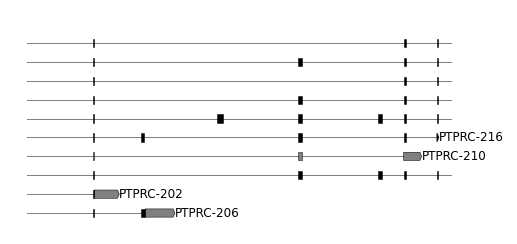

In [69]:
from IPython.display import Image
Image(filename='./sashimi_plots/sashimi_T4_PTPRC.png',retina=False)

In [27]:
pwd

'/nowakowskilab/data1/derek/scSLR/notebooks/fig2'

In [28]:
#!pyGenomeTracks --tracks ./sashimi_plots/sashimi.ini --plotWidth 15 --region 'chr1:198690000-198705000' -o ./plots/sashimi_T4_PTPRC.pdf